In [1]:
import sklearn
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import matplotlib.pyplot as plt
import argparse
from torch.autograd import Variable

In [7]:
X = np.load("/Users/srivatsavpyda/Desktop/gm_vae_project/tests/image_data_GAN.npy")

# K-Means to get Clusters

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
labels = np.array(kmeans.labels_)

# PCA + TSNE on Original Images

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
pca_mnist = PCA(n_components=100)
Y = pca_mnist.fit_transform(X)
X_embedded = TSNE(n_components=2).fit_transform(Y)

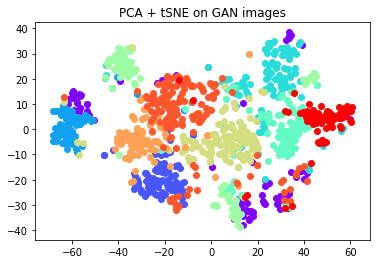

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=c, label=str(i))
#ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.85), shadow=True, ncol=1)
plt.title('PCA + tSNE on GAN images')
plt.show()